In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, silhouette_score

from src.datasets import get_linear, get_blobs

# Test code to collect the data projection in the hidden layer

In [2]:
model = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
    batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
    power_t=0.5, max_iter=256, tol=0.0001, validation_fraction=0.1,
    beta_1=0, beta_2=0, epsilon=1e-08, max_fun=15000,
    verbose=False, warm_start=False, shuffle=True, random_state=None, 
)

In [3]:
data, target = get_linear()

In [4]:
model.fit(data, target)
print(classification_report(y_pred=model.predict(data), y_true=target))

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98      1024
           1       0.98      0.97      0.98      1024

    accuracy                           0.98      2048
   macro avg       0.98      0.98      0.98      2048
weighted avg       0.98      0.98      0.98      2048



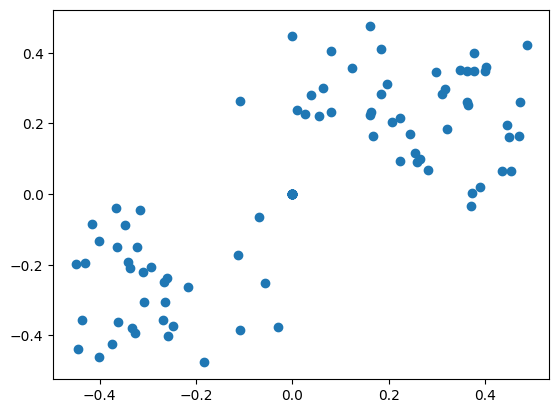

In [5]:
coefs = model.coefs_[0]
plt.scatter(coefs[0,: ], coefs[1, :])

In [6]:
data.shape, coefs.shape

((2048, 2), (2, 100))

In [7]:
projection = data @ coefs

In [8]:
projection.shape

(2048, 100)

In [9]:
silhouette_score(projection, labels=target)

0.6469577375018267

# Train multiple times to evaluation changes in the silhouette score

In [31]:
data, target = get_blobs(n_obs=128)

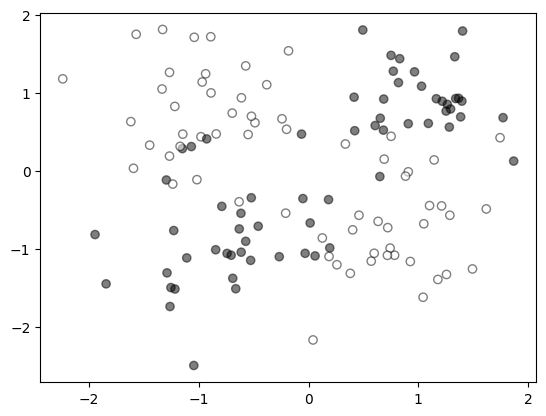

In [32]:
plt.scatter(data[0], data[1], c=target, cmap="binary", alpha=.5, edgecolors="black")

In [48]:
results = list()

for i, beta in enumerate(np.linspace(0, 1, num=5, endpoint=False)):

    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3)

    model = MLPClassifier(
        hidden_layer_sizes=(256,), activation='relu', solver='adam', alpha=0.0001,
        batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
        max_iter=1024, tol=0.0001,
        verbose=False, warm_start=False, shuffle=True, random_state=None, 
        beta_1=beta, beta_2=0,
    )

    model.fit(X_train, y_train)
    projection = data @ model.coefs_[0]

    accuracy_train = accuracy_score(y_pred=model.predict(X_train), y_true=y_train)
    accuracy_test = accuracy_score(y_pred=model.predict(X_test), y_true=y_test)
    silhouette = silhouette_score(projection, labels=target)

    decimals = 5
    res_dict = {
        "beta_2": np.round(beta, decimals=decimals),
        "accuracy_train": np.round(accuracy_train, decimals=decimals),
        "accuracy_test": np.round(accuracy_test, decimals=decimals),
        "silhouette": np.round(silhouette, decimals=decimals)
    }

    print(f'{i:02d}', res_dict)

    results.append(res_dict)

00 {'beta_2': 0.0, 'accuracy_train': 0.89888, 'accuracy_test': 0.89744, 'silhouette': 0.06437}
01 {'beta_2': 0.2, 'accuracy_train': 0.70787, 'accuracy_test': 0.66667, 'silhouette': 0.0697}
02 {'beta_2': 0.4, 'accuracy_train': 0.65169, 'accuracy_test': 0.76923, 'silhouette': 0.06215}
03 {'beta_2': 0.6, 'accuracy_train': 0.53933, 'accuracy_test': 0.4359, 'silhouette': 0.10168}
04 {'beta_2': 0.8, 'accuracy_train': 0.48315, 'accuracy_test': 0.51282, 'silhouette': 0.0822}


In [49]:
res_df = pd.DataFrame(results)

<AxesSubplot:xlabel='beta_2'>

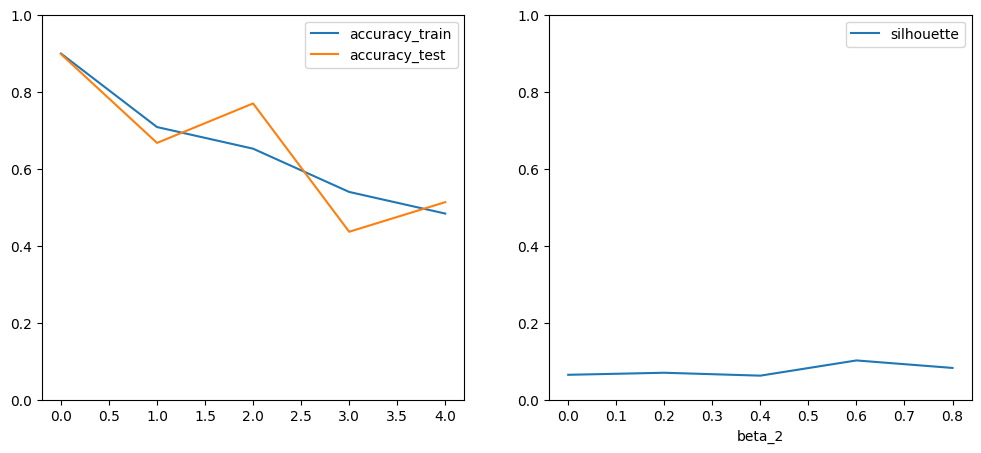

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

res_df[["accuracy_train", "accuracy_test"]].plot(ax=ax[0], ylim=(0, 1))
res_df.plot(x="beta_2", y="silhouette", ax=ax[1], ylim=(0, 1))